## Task 1



In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv('food_claims_2212.csv')
df.head()

,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
0,1,317,R$ 74474.55,51231.37,RECIFE,15,False,unknown
1,2,195,R$ 52137.83,42111.30,FORTALEZA,12,True,unknown
2,3,183,R$ 24447.2,23986.30,SAO LUIS,10,True,meat
3,4,186,R$ 29006.28,27942.72,FORTALEZA,11,False,meat
4,5,138,R$ 19520.6,16251.06,RECIFE,11,False,vegetable


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   claim_id              2000 non-null   int64  
 1   time_to_close         2000 non-null   int64  
 2   claim_amount          2000 non-null   object 
 3   amount_paid           1964 non-null   float64
 4   location              2000 non-null   object 
 5   individuals_on_claim  2000 non-null   int64  
 6   linked_cases          1974 non-null   object 
 7   cause                 2000 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 125.1+ KB


In [47]:
#num of missing values in amount_paid
df.amount_paid.isna().sum()

36

In [48]:
#num of missing values in linked_cases
df.linked_cases.isna().sum()

26

In [49]:
df.cause.unique()

array(['unknown', 'meat', 'vegetable', ' Meat', 'VEGETABLES'],
      dtype=object)

In [50]:
#resolve inconsistent values
df.cause = df.cause.str.lower()
df.cause = df.cause.str.strip()
df.cause = df.cause.replace('vegetables', 'vegetable')
df.claim_amount = df.claim_amount.str.strip('R$ ')
df.claim_amount = df.claim_amount.astype('float')
#fill NaN value
df.amount_paid = df.amount_paid.fillna(df.amount_paid.median())
df.linked_cases = df.linked_cases.fillna(False)

- There are some inconsistences in _cause_ column
- _amount_paid_ and _linked_cases_ are 2 columns having null values and the number of NaN value in those columns are 36 and 26 respectively
- In order to values in each column match with description:
   + With inconsistences in _cause_ column, using str methods including .lower(), .strip() and .replace() 
   + NaN values in _amount_paid_ column are filled by median value of column by using .fillna() while NaN values in _linked_cases_ are replaced by False
   + remove the 'R$' in _claim_amount_ column and then convert its datatype to float

## Task 2

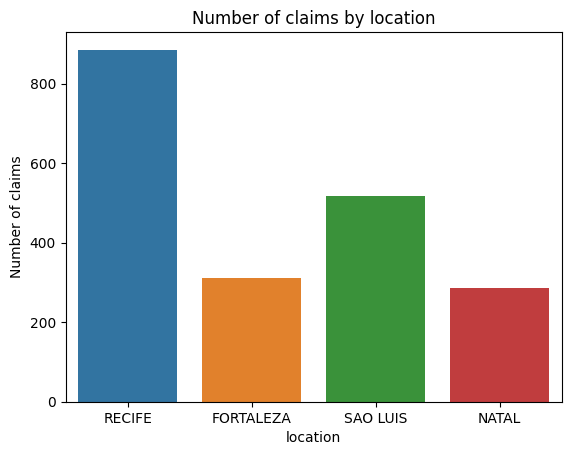

In [51]:
sns.countplot(data=df, x='location')
plt.ylabel('Number of claims')
plt.title('Number of claims by location')
plt.savefig('image_1.png')
plt.show()

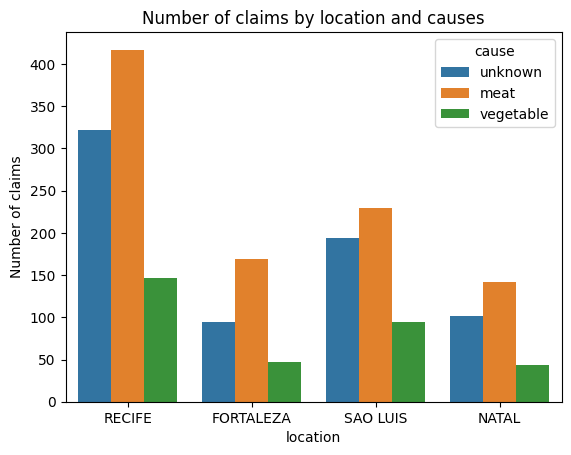

In [52]:
# location_by_cause = df.groupby(['location','cause'])
sns.countplot(data=df, x='location', hue='cause')
plt.ylabel('Number of claims')
plt.title('Number of claims by location and causes')
plt.savefig('image_2.png')
plt.show()

- RECIFE has the highest claims in both total and by each cause, whereas NATAL was the location having the least food poisoning claims.
- Meat seems to be the most critical reason leading to food poisoning while food poisoning cases resulted from unknown reasons ranked second place in all 4 location.
![](image_1.png) ![](image_2.png)


## Task 3

In [53]:
average_days_closed = int(np.round(df.time_to_close.mean()))

In [54]:
#percentage of claims are closed within 6 months (180 days)
less_180_perc = stats.percentileofscore(df.time_to_close, 180, kind='weak')
#percentage of claims take 1 year or more to close
more_than_a_year_perc = np.round(100 - stats.percentileofscore(df.time_to_close, 366, kind='weak'),2)
#percentage of claims are closed between 6 and 12 months (181 to 365 days)
latter_half_of_year_perc = 100 - less_180_perc - more_than_a_year_perc

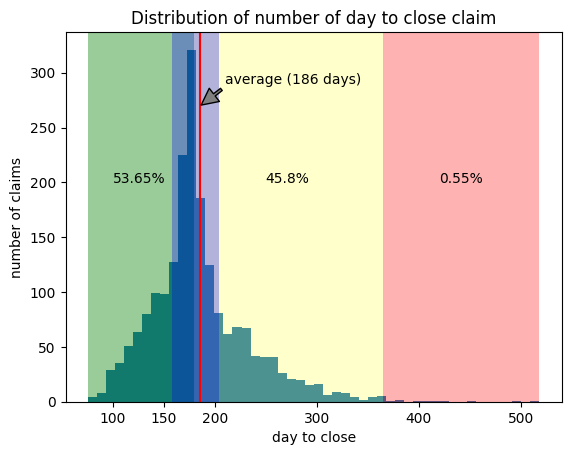

In [55]:
plt.hist(df.time_to_close, bins=50)
plt.axvline(df.time_to_close.mean(), color='r')
plt.xticks([100,150,200, 300,400,500])
#area of claims closed within 6 months (180 days)
plt.axvspan(np.percentile(df.time_to_close,0), 180, facecolor='green', alpha=0.4)
#area of claims closed in 6 to 12 months (181 to 365 days)
plt.axvspan(180, 365, facecolor='yellow', alpha=0.2)
#area of claims closed more than 1 year (above 365 days)
plt.axvspan(365,max(df.time_to_close),facecolor='red', alpha=0.3)
#50% of claims in range
plt.axvspan(np.percentile(df.time_to_close,25), np.percentile(df.time_to_close,75), facecolor='blue', alpha=0.3)

plt.annotate('average (186 days)', xy=(186,270), xytext=(210,290), arrowprops = {'facecolor':'gray', 'width': 2, 'shrink': 0.03})
plt.text(100,200, '53.65%')
plt.text(250,200, '45.8%')
plt.text(420,200, '0.55%')
plt.xlabel('day to close')
plt.ylabel('number of claims')
plt.title('Distribution of number of day to close claim')
plt.savefig('image_3.png')
plt.show()

- The average day to close the claims is 186 days
- 50% of total claims is closed in range from 158 to 204 days
- Approximately 53.65% of total claims is closed within 180 days
- 45.8% of total claims is closed within 6 to 12 months
- The number of claims taking more than a year to close accounts just under 1% of total claims
![](image_3.png) 

## Task 4

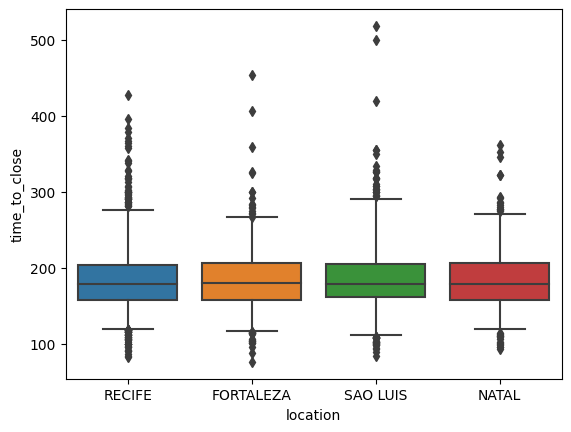

In [56]:
#Distribution of time-to-close claims in 4 locations
plt.subplot()
sns.boxplot(data=df, x='location', y='time_to_close',whis=[5,95])
plt.savefig('image_4.png')
plt.show()

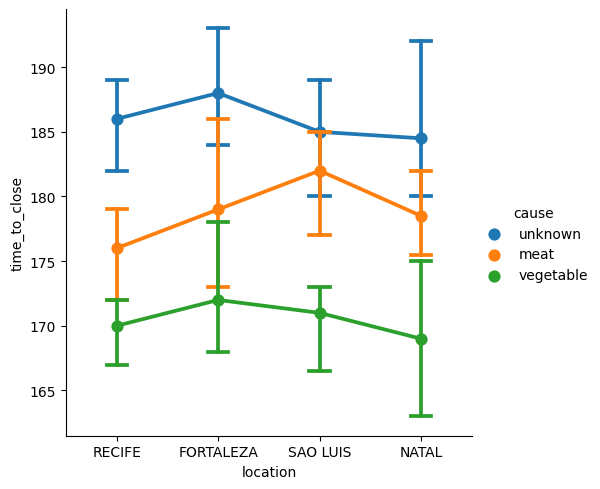

In [57]:
#The median time-to-close of claims by cause in 4 locations 
sns.catplot(data=df, y='time_to_close', x='location', hue='cause',estimator='median', kind='point', capsize=0.2)
plt.savefig('image_5.png')
plt.show()

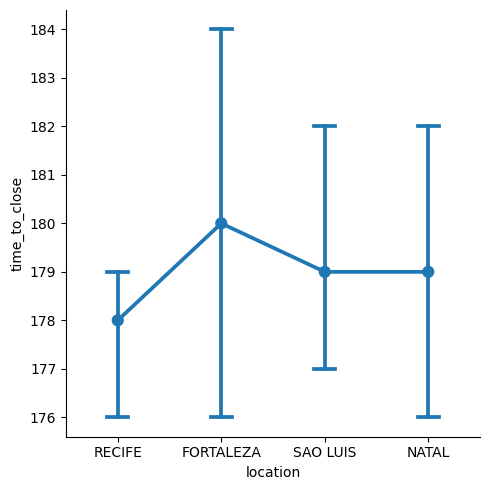

In [58]:
#The median time-to-close of claims in 4 locations
sns.catplot(data=df, y='time_to_close', x='location', estimator='median', kind='point', capsize=0.2)
plt.savefig('image_6.png')
plt.show()

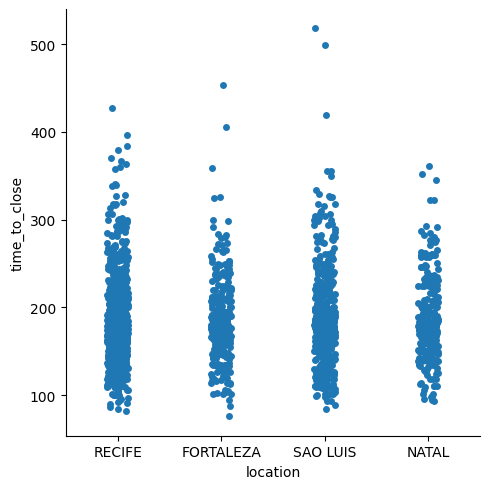

In [59]:
sns.catplot(data=df, y='time_to_close', x='location')
plt.savefig('image_7.png')
plt.show()

- There are some differences in time to close each claim varied by causes (meat, vegetable, meat) among 4 locations. More specifically,the median time-to-close claim due to unknown reason is the highest in 3 causes, followed by meat, and vegetable respectively.
- Despite of that, in general, there is a marginally different in time to close of claims among 4 locations so it could be said that there is very weak correlation between location and time to close claims.
![](image_4.png) ![](image_5.png) ![](image_6.png) ![](image_7.png)